In [7]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [9]:
# Load the dataset from UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')

# Display the first few rows of the dataset
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
wine_data.shape

(1599, 12)

In [11]:
Data = np.array(wine_data)
features = wine_data.columns
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
Data.shape

(1599, 12)

In [13]:
#atributes
X_data = Data[:,:11]

#quality
y_label = Data[:,-1]

In [14]:
print(f"X shape: {X_data.shape}")
print(f"y shape: {y_label.shape}")

X shape: (1599, 11)
y shape: (1599,)


In [15]:
#convert them to tensors

X = torch.tensor(X_data, dtype=torch.float32).to(device)
y = torch.tensor(y_label, dtype=torch.float32).unsqueeze(dim=1).to(device)
X, y

(tensor([[ 7.4000,  0.7000,  0.0000,  ...,  3.5100,  0.5600,  9.4000],
         [ 7.8000,  0.8800,  0.0000,  ...,  3.2000,  0.6800,  9.8000],
         [ 7.8000,  0.7600,  0.0400,  ...,  3.2600,  0.6500,  9.8000],
         ...,
         [ 6.3000,  0.5100,  0.1300,  ...,  3.4200,  0.7500, 11.0000],
         [ 5.9000,  0.6450,  0.1200,  ...,  3.5700,  0.7100, 10.2000],
         [ 6.0000,  0.3100,  0.4700,  ...,  3.3900,  0.6600, 11.0000]],
        device='cuda:0'),
 tensor([[5.],
         [5.],
         [5.],
         ...,
         [6.],
         [5.],
         [6.]], device='cuda:0'))

In [16]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: torch.Size([1599, 11])
y shape: torch.Size([1599, 1])


In [17]:
#splitting data
split = int(X.shape[0]*0.8)+1
X_train, y_train = X[:split,:], y[:split,:]
X_test, y_test = X[split:,:], y[split:,:]
print(f"X train shape: {X_train.shape}")
print(f"y train shape: {y_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: torch.Size([1280, 11])
y train shape: torch.Size([1280, 1])
X test shape: torch.Size([319, 11])
y test shape: torch.Size([319, 1])


In [18]:
#Creating the modle

class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=11, out_features=1, bias=True)

    def forward(self, x: torch.tensor):
        return self.linear(x)

In [19]:
torch.manual_seed(42)
model = LinearRegressor()
list(model.parameters())

[Parameter containing:
 tensor([[ 0.2305,  0.2503, -0.0706,  0.2770, -0.0661,  0.0608, -0.1468,  0.1771,
           0.2658, -0.2212,  0.2621]], requires_grad=True),
 Parameter containing:
 tensor([0.0564], requires_grad=True)]

In [20]:
model.to(device)
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.2305,  0.2503, -0.0706,  0.2770, -0.0661,  0.0608, -0.1468,  0.1771,
                        0.2658, -0.2212,  0.2621]], device='cuda:0')),
             ('linear.bias', tensor([0.0564], device='cuda:0'))])

In [21]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.1)

In [22]:
#training
torch.manual_seed(42)

epochs = 250

epoch_count = []
train_loss = []
test_loss = []

for epoch in range(epochs+1):

    model.train()
    training_loss = loss_func(model(X_train), y_train)
    optimizer.zero_grad()
    training_loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        y_pred = model(X_test)
        testing_loss = loss_func(y_pred, y_test)

    if epoch%10 == 0:
        epoch_count.append(epoch)
        train_loss.append(training_loss)
        test_loss.append(testing_loss)
        if epoch%50 == 0:
            print(f"epoch: {epoch} | training loss= {training_loss} | testing loss= {testing_loss}.")

epoch: 0 | training loss= 46.23872375488281 | testing loss= 19.839853286743164.
epoch: 50 | training loss= 0.5536826252937317 | testing loss= 0.6760929822921753.
epoch: 100 | training loss= 0.4787287712097168 | testing loss= 0.5201334357261658.
epoch: 150 | training loss= 0.45557901263237 | testing loss= 0.49362531304359436.
epoch: 200 | training loss= 0.44376832246780396 | testing loss= 0.4766679108142853.
epoch: 250 | training loss= 0.4372269809246063 | testing loss= 0.46608445048332214.


In [23]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0632, -0.6144,  0.0937, -0.0093, -0.2329,  0.0038, -0.0028,  0.2737,
                        0.3366,  0.4028,  0.3578]], device='cuda:0')),
             ('linear.bias', tensor([0.1565], device='cuda:0'))])

Text(0.5, 1.0, 'Loss curve')

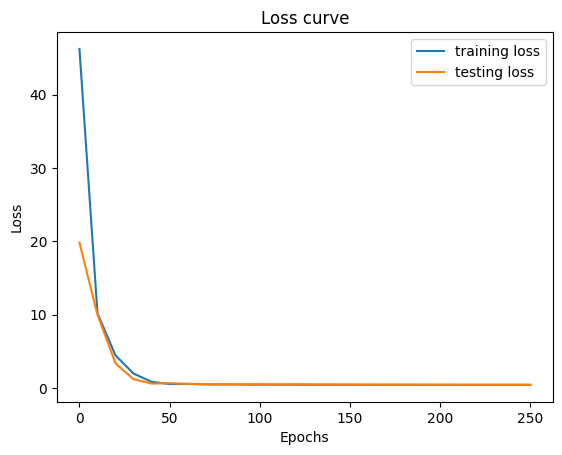

In [24]:
plt.plot(epoch_count, torch.tensor(train_loss).cpu().numpy(), label ="training loss")
plt.plot(epoch_count, torch.tensor(test_loss).cpu().numpy(), label="testing loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss curve")

In [25]:
#predictions
model.eval()
with torch.inference_mode():
    quality = model(X_test)
    loss = loss_func(quality, y_test)

print(f"Loss of the prediction = {loss}")

Loss of the prediction = 0.46608445048332214
